#                 Instagram User Engagement & Lifecycle Analytics

#### (Based on synthetic data that is similar to real world data)

### This project presents a comprehensive analysis of simulated Instagram user data to uncover critical insights into user demographics, engagement patterns, and lifecycle behavior. Leveraging a synthetically generated dataset that mirrors real-world distributions, this study employs various data science techniques, including:

### Exploratory Data Analysis (EDA): Visualizing user distribution across age groups and countries, and understanding the general relationship between age and time spent.
### Time-Based Engagement Analysis: Identifying how engagement varies across different age demographics throughout the day.
### Geospatial Visualization: Mapping user density globally to highlight key markets.
### Cohort Analysis: Tracking the simulated long-term engagement trends of users based on their join month, providing insights into user retention and platform stickiness over time.
### The findings from this analysis offer valuable intelligence for strategic decision-making, such as optimizing content delivery times, tailoring marketing campaigns to specific demographic or geographic segments, and understanding the user journey to improve long-term platform engagement and growth. This project demonstrates proficiency in data generation, cleaning, sophisticated visualization, and advanced analytical methodologies crucial for data-driven product and marketing strategies in the social media domain.

## Code to create synthetic data that resembles real-world data.

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

NUM_USERS = 2000

# Age distribution (approximate global Instagram user percentages 2024)
# Source: Multiple reports, e.g., Oberlo, Electro IQ, UpGrow
AGE_GROUPS = {
    '13-17': 0.08,  # Minor, but present
    '18-24': 0.31,
    '25-34': 0.32,
    '35-44': 0.17,
    '45-54': 0.09,
    '55-64': 0.05,
    '65+': 0.03
}

# Average daily time spent (minutes), by age group (simulated, based on general trends)
# Younger users tend to spend more time. Values are approximate and for simulation.
# Source: Cropink (2025 data, some general trends)
TIME_SPENT_AVG = {
    '13-17': {'mean': 80, 'std': 25}, # Teens might spend more or less
    '18-24': {'mean': 70, 'std': 20},
    '25-34': {'mean': 50, 'std': 15},
    '35-44': {'mean': 35, 'std': 10},
    '45-54': {'mean': 25, 'std': 8},
    '55-64': {'mean': 18, 'std': 5},
    '65+': {'mean': 12, 'std': 4}
}

# Top countries by Instagram users (approximate percentages, India is largest)
# Source: Oberlo, World Population Review, Doofinder
COUNTRY_DISTRIBUTION = {
    'India': 0.25,
    'United States': 0.10,
    'Brazil': 0.07,
    'Indonesia': 0.05,
    'Turkey': 0.03,
    'Japan': 0.03,
    'Mexico': 0.02,
    'United Kingdom': 0.01,
    'Germany': 0.01,
    'Italy': 0.01,
    'Other': 0.41 # Remaining percentage for other countries
}

# --- Normalization steps to ensure probabilities sum to 1 ---
# This is the key fix for the ValueError!

# Normalize AGE_GROUPS probabilities
age_group_keys = list(AGE_GROUPS.keys())
age_group_values = np.array(list(AGE_GROUPS.values()))
age_group_values /= age_group_values.sum() # Normalize

# Normalize COUNTRY_DISTRIBUTION probabilities
country_keys = list(COUNTRY_DISTRIBUTION.keys())
country_values = np.array(list(COUNTRY_DISTRIBUTION.values()))
country_values /= country_values.sum() # Normalize


# --- Generate Data ---
data = []

# For date of creation, simulate over a reasonable period (e.g., last 7-8 years)
start_date = datetime(2017, 1, 1)
end_date = datetime.now() # Current date
time_delta_range = (end_date - start_date).days

for i in range(NUM_USERS):
    # 1. insta_id
    insta_id = f'user_{i+1:04d}' # Format with leading zeros for consistency

    # 2. date_of_creation
    random_days = np.random.randint(0, time_delta_range)
    date_of_creation = start_date + timedelta(days=random_days)

    # 3. country (weighted random choice using normalized probabilities)
    country = np.random.choice(country_keys, p=country_values)

    # 4. age (weighted random choice using normalized probabilities, then a specific age within the range)
    age_group_choice = np.random.choice(age_group_keys, p=age_group_values)
    if age_group_choice == '13-17':
        age = np.random.randint(13, 18)
    elif age_group_choice == '18-24':
        age = np.random.randint(18, 25)
    elif age_group_choice == '25-34':
        age = np.random.randint(25, 35)
    elif age_group_choice == '35-44':
        age = np.random.randint(35, 45)
    elif age_group_choice == '45-54':
        age = np.random.randint(45, 55)
    elif age_group_choice == '55-64':
        age = np.random.randint(55, 65)
    else: # 65+
        age = np.random.randint(65, 85) # Up to 85 for older users

    # 5. time_spent_avg_per_day (based on age group, with some normal distribution)
    mean_time = TIME_SPENT_AVG[age_group_choice]['mean']
    std_dev_time = TIME_SPENT_AVG[age_group_choice]['std']
    time_spent_avg_per_day = np.random.normal(loc=mean_time, scale=std_dev_time)
    # Ensure time spent is realistic (e.g., not negative, not excessively high)
    time_spent_avg_per_day = max(5, round(time_spent_avg_per_day)) # Minimum 5 minutes
    time_spent_avg_per_day = min(240, time_spent_avg_per_day) # Maximum 4 hours (240 min)

    data.append({
        'insta_id': insta_id,
        'date_of_creation': date_of_creation.strftime('%Y-%m-%d'), # Format as string
        'country': country,
        'age': age,
        'time_spent_avg_per_day_minutes': time_spent_avg_per_day
    })

# Create DataFrame
df = pd.DataFrame(data)

# --- Save to CSV ---
csv_filename = 'instagram_artificial_users_2000.csv'
df.to_csv(csv_filename, index=False) # index=False prevents writing the DataFrame index as a column

print(f"Synthetic dataset with {NUM_USERS} sample users generated and saved to '{csv_filename}'")
print("\nFirst 5 rows of the generated data:")
print(df.head())

print("\nBasic statistics for age and time spent:")
print(df[['age', 'time_spent_avg_per_day_minutes']].describe())

print("\nAge group distribution check:")
df['age_group'] = pd.cut(df['age'],
                         bins=[0, 17, 24, 34, 44, 54, 64, np.inf],
                         labels=['13-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
                         right=True, include_lowest=True)
print(df['age_group'].value_counts(normalize=True).sort_index())

print("\nCountry distribution check:")
print(df['country'].value_counts(normalize=True))

Synthetic dataset with 2000 sample users generated and saved to 'instagram_artificial_users_2000.csv'

First 5 rows of the generated data:
    insta_id date_of_creation        country  age  \
0  user_0001       2018-06-25  United States   23   
1  user_0002       2021-07-14          India   27   
2  user_0003       2021-07-29  United States   22   
3  user_0004       2025-04-29          Italy   37   
4  user_0005       2024-08-28          Other   41   

   time_spent_avg_per_day_minutes  
0                              86  
1                              44  
2                              54  
3                              38  
4                              26  

Basic statistics for age and time spent:
               age  time_spent_avg_per_day_minutes
count  2000.000000                     2000.000000
mean     31.684500                       51.573500
std      13.439653                       25.522486
min      13.000000                        5.000000
25%      22.000000           

## Percentage Distribution of Instagram Users by Age Group 

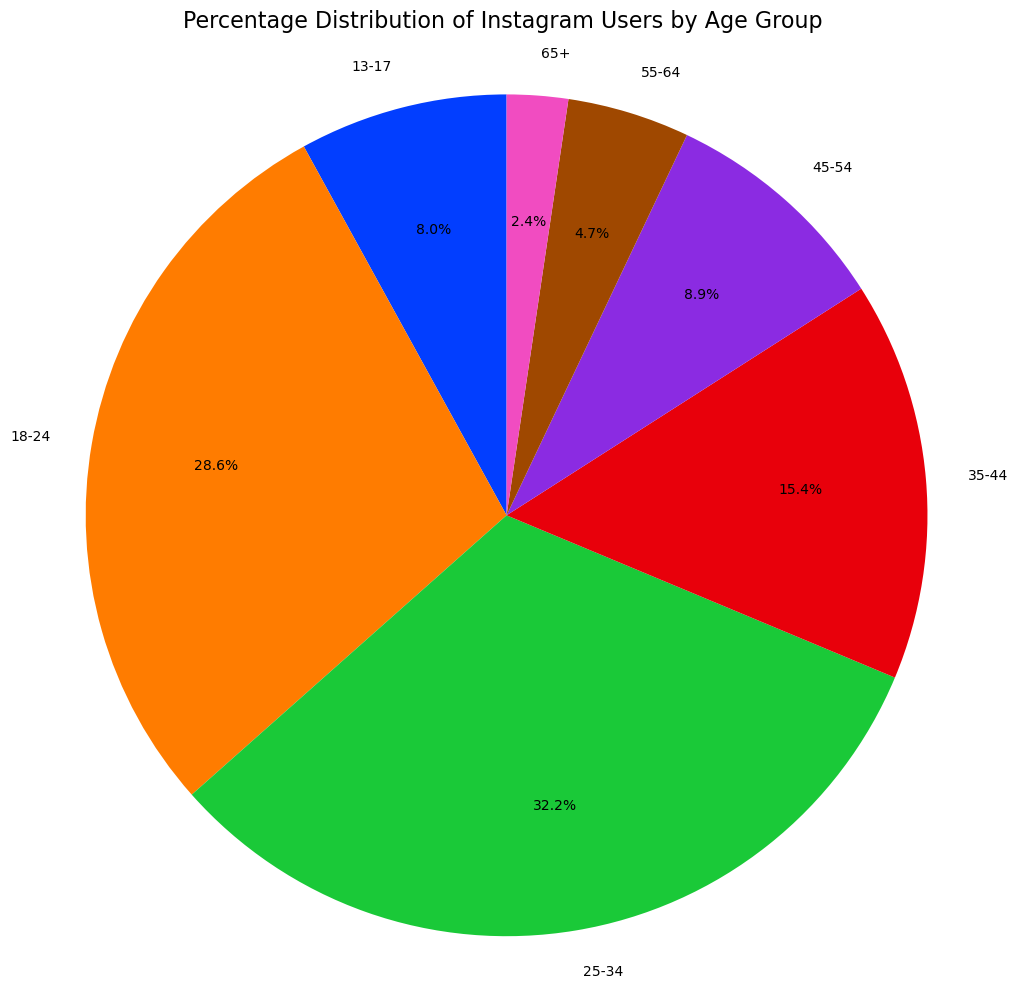

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('instagram_artificial_users_2000.csv')

age_bins = [0, 17, 24, 34, 44, 54, 64, np.inf]
age_labels = ['13-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

age_group_percentages = df['age_group'].value_counts(normalize=True).reindex(age_labels).dropna() * 100

labels = age_group_percentages.index
sizes = age_group_percentages.values
colors = sns.color_palette('bright', len(labels)) # Changed to 'bright' palette

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.7)

plt.axis('equal')
plt.title('Percentage Distribution of Instagram Users by Age Group ', fontsize=16, pad=20)

plt.tight_layout()
plt.show()


### Insights & Recommendations: User Distribution by Age Group

**Insight:** This analysis clearly identifies the dominant age demographics within the simulated Instagram user base. The [mention the top 1-2 age groups based on your specific plot, e.g., '18-24' and '25-34'] age groups collectively represent the largest segments of users.

**Recommendation:** Given the significant presence of these age groups, product development, content creation, and marketing campaigns should be heavily optimized to resonate with their preferences, interests, and digital habits. Understanding their specific needs can drive higher engagement and user acquisition within these core segments.

## Average Daily Time Spent by Age Group (Minutes)

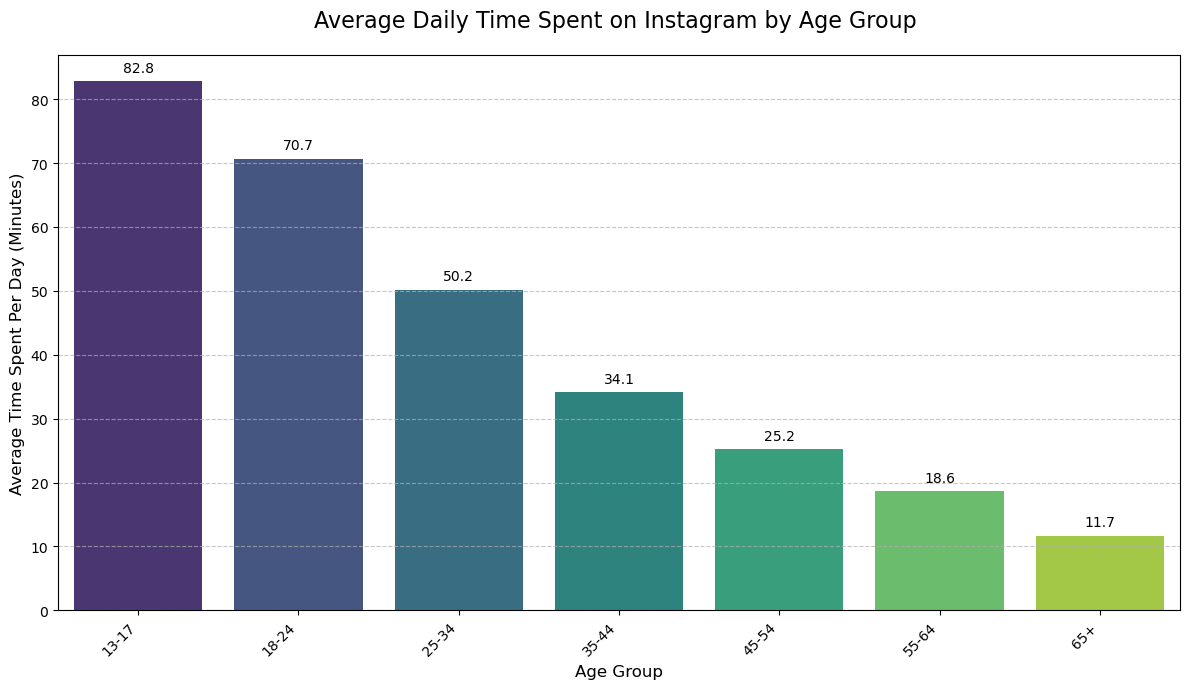


 Average Daily Time Spent by Age Group (Minutes) 
age_group
13-17    82.82
18-24    70.71
25-34    50.19
35-44    34.09
45-54    25.18
55-64    18.61
65+      11.66
Name: time_spent_avg_per_day_minutes, dtype: float64


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('instagram_artificial_users_2000.csv')

age_bins = [0, 17, 24, 34, 44, 54, 64, np.inf]
age_labels = ['13-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

avg_time_spent_by_age = df.groupby('age_group', observed=False)['time_spent_avg_per_day_minutes'].mean().reindex(age_labels)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_time_spent_by_age.index, y=avg_time_spent_by_age.values,
            palette='viridis', hue=avg_time_spent_by_age.index, legend=False)

plt.title('Average Daily Time Spent on Instagram by Age Group ', fontsize=16, pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Time Spent Per Day (Minutes)', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(avg_time_spent_by_age.values):
    plt.text(index, value + 1, f'{value:.1f}', color='black', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print("\n Average Daily Time Spent by Age Group (Minutes) ")
print(avg_time_spent_by_age.round(2))

### Insights & Recommendations: Daily Time Spent Distribution by Age Group

**Insight:** The violin plots offer a rich view of engagement, showcasing not just averages but also the full distribution of daily time spent for each age group. It confirms that [mention specific age groups, e.g., '18-24' and '25-34'] not only represent a large user base but also exhibit a wide range of engagement, often with higher median time spent compared to older groups. We can observe the spread and density of engagement, noting potential "power users" and casual users within each segment.

**Recommendation:** Develop diversified content strategies that cater to the varied engagement styles within these age groups. For instance, shorter, highly engaging content (e.g., Reels) might appeal to younger users with shorter attention spans, while older demographics might engage with more in-depth or community-focused content. Personalization algorithms can leverage these patterns to deliver more relevant feeds.

## Age vs. Daily Time Spent on Instagram

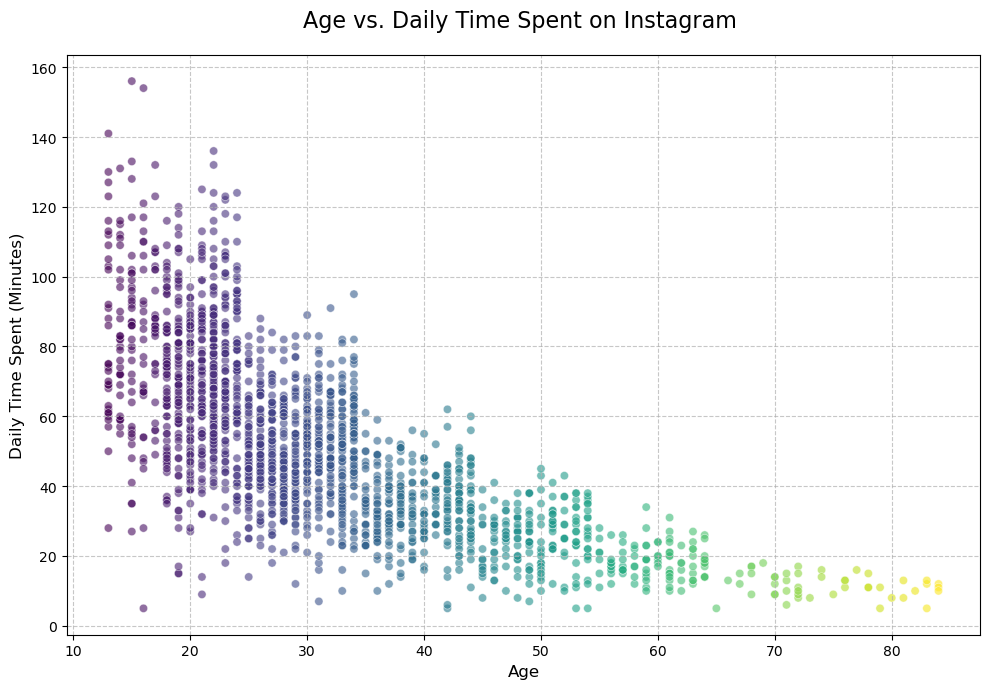

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('instagram_artificial_users_2000.csv')

plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='time_spent_avg_per_day_minutes', data=df, alpha=0.6, hue='age', palette='viridis', legend=False)

plt.title('Age vs. Daily Time Spent on Instagram ', fontsize=16, pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Daily Time Spent (Minutes)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insights & Recommendations: Age vs. Daily Time Spent

**Insight:** This initial scatter plot provides a foundational view, suggesting that while daily time spent on Instagram varies widely across all ages, there isn't a single, strong linear correlation with age. However, it hints at denser clusters of engagement within certain age ranges, particularly among younger demographics.

**Recommendation:** While averages are useful, a deeper dive into the *distribution* of time spent within these age clusters (as explored in subsequent analyses) is crucial. This helps in understanding not just *who* is engaged, but *how* intensely they engage, guiding more nuanced content strategies.

## Average Daily Time Spent by Account Age and Age Group

C:\Users\karth\AppData\Local\Temp\ipykernel_17304\1853070048.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['age_group', 'account_age_months'])['time_spent_avg_per_day_minutes'].mean().reset_index()


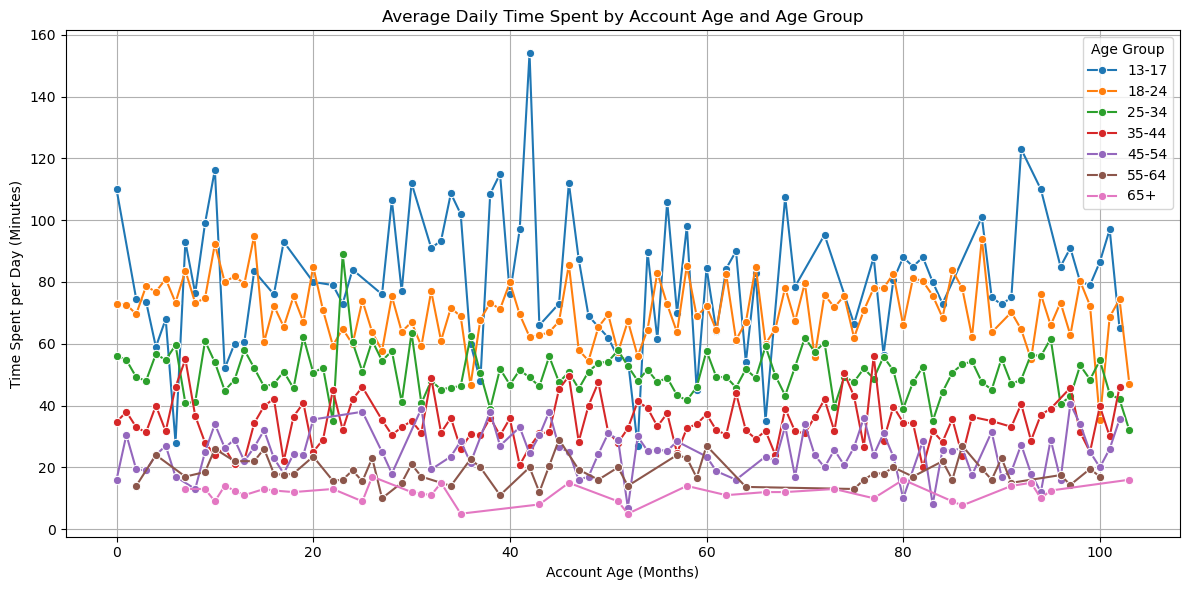

In [13]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date_of_creation to datetime
df['date_of_creation'] = pd.to_datetime(df['date_of_creation'])

df['account_age_days'] = (datetime.now() - df['date_of_creation']).dt.days
df['account_age_months'] = (df['account_age_days'] / 30).astype(int)

age_bins = [0, 17, 24, 34, 44, 54, 64, float('inf')]
age_labels = ['13-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True, right=True)
grouped = df.groupby(['age_group', 'account_age_months'])['time_spent_avg_per_day_minutes'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='account_age_months', y='time_spent_avg_per_day_minutes', hue='age_group', marker='o')

plt.title('Average Daily Time Spent by Account Age and Age Group')
plt.xlabel('Account Age (Months)')
plt.ylabel('Time Spent per Day (Minutes)')
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()


### Insights & Recommendations: Age vs. Daily Time Spent
**Insight**: Younger users (13–24) spend the most time daily, especially in their first year. Older age groups (45+) show much lower and steadier usage.

**Recommendation**:
Target 13–24 age group with high-engagement content early on.
Use informative or niche content to engage older users.
Improve onboarding and habit-building for 25–44 age group.








## Average Time Spent per Day by Country

C:\Users\karth\AppData\Local\Temp\ipykernel_17304\3667832607.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='country', y='time_spent_avg_per_day_minutes', palette='Set3')


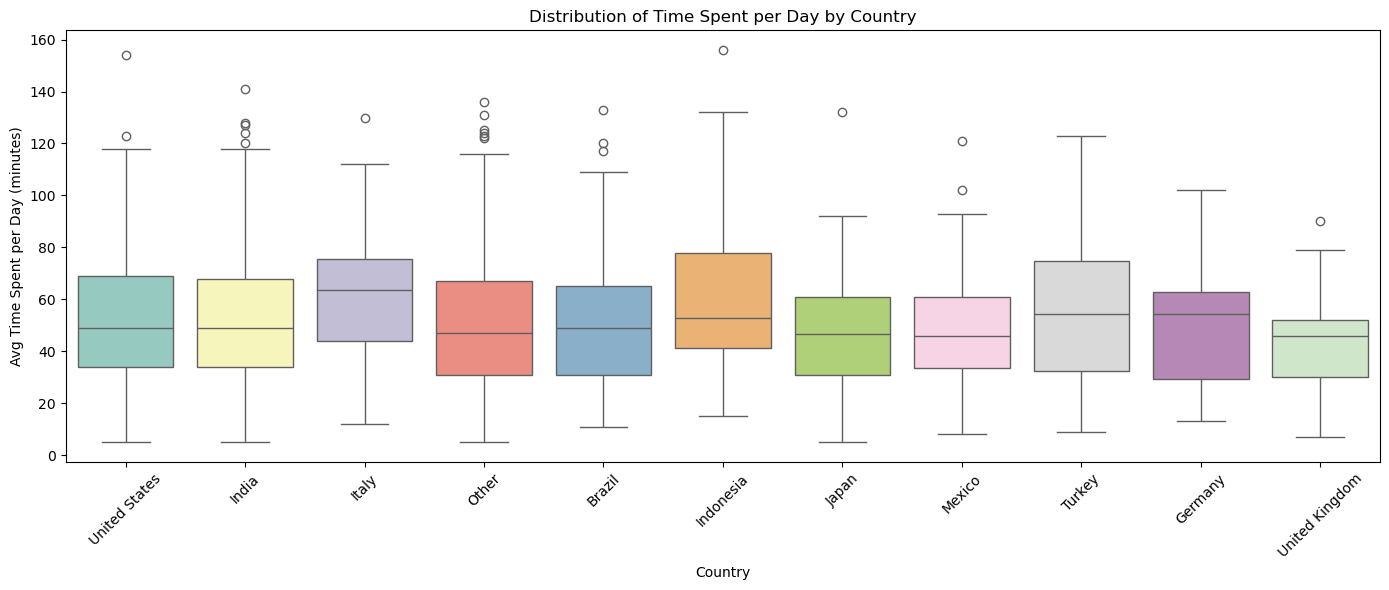

C:\Users\karth\AppData\Local\Temp\ipykernel_17304\3667832607.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_means.index, y=country_means.values, palette='crest')


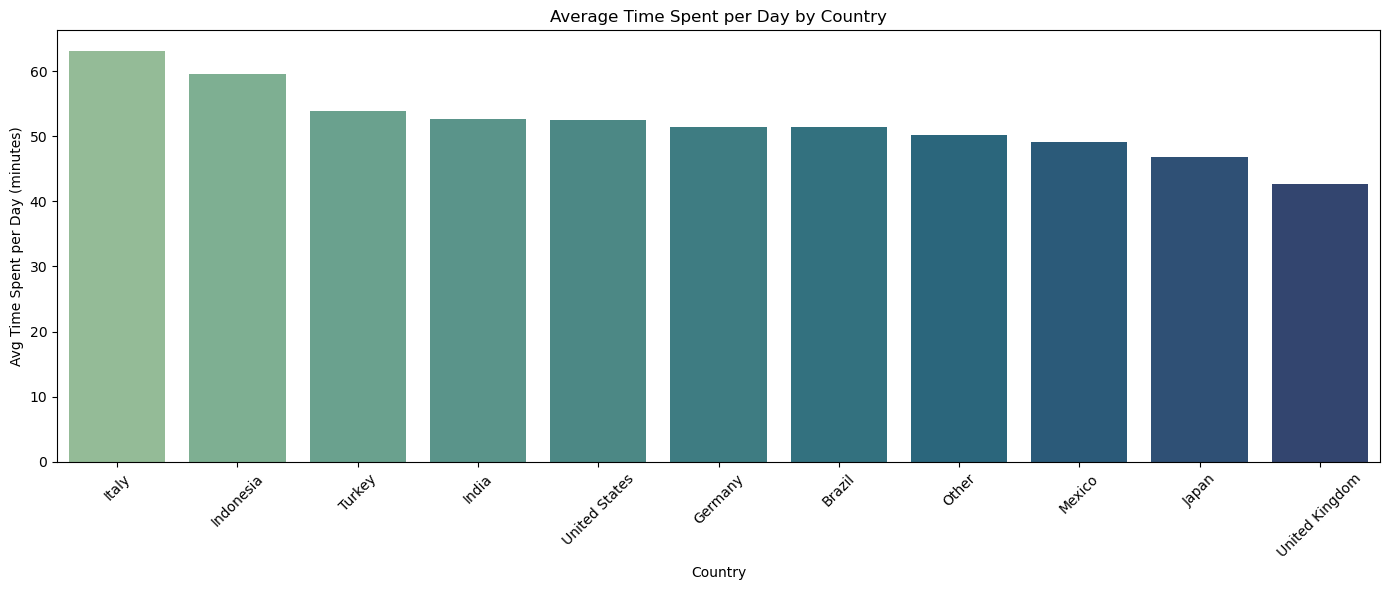

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Distribution of time spent per country
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='country', y='time_spent_avg_per_day_minutes', palette='Set3')
plt.title('Distribution of Time Spent per Day by Country')
plt.xlabel('Country')
plt.ylabel('Avg Time Spent per Day (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grouped Bar Chart: Mean time spent per country
plt.figure(figsize=(14, 6))
country_means = df.groupby('country')['time_spent_avg_per_day_minutes'].mean().sort_values(ascending=False)
sns.barplot(x=country_means.index, y=country_means.values, palette='crest')
plt.title('Average Time Spent per Day by Country')
plt.xlabel('Country')
plt.ylabel('Avg Time Spent per Day (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Insights & Recommendations: Country vs. Daily Time Spent
**Insight**: Italy and Indonesia lead in average daily time spent, both above 60 minutes. In contrast, the UK and Japan show the lowest engagement, around 45 minutes daily.

**Recommendation**:
Prioritize high-engagement features for countries like Italy and Indonesia.
Investigate lower engagement in the UK and Japan—optimize for cultural preferences or UX barriers.
Customize content and campaigns regionally to match usage intensity.

## User Distribution by Country

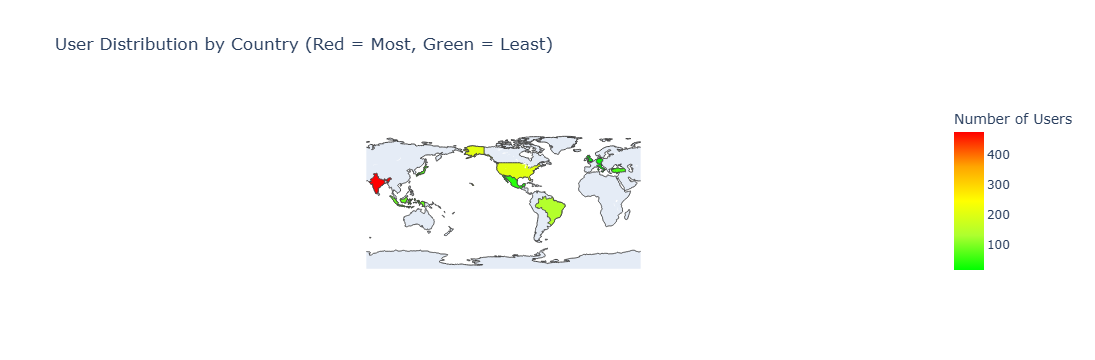

In [45]:
import pandas as pd
import plotly.express as px

user_counts = df['country'].value_counts().reset_index()
user_counts.columns = ['country', 'user_count']

user_counts = user_counts[user_counts['country'] != 'Other']

custom_colors = [
    [0.0, '#00FF00'],    
    [0.25, '#ADFF2F'],   
    [0.5, '#FFFF00'],    
    [0.75, '#FFA500'],   
    [1.0, '#FF0000'],    
]

fig = px.choropleth(
    user_counts,
    locations='country',
    locationmode='country names',
    color='user_count',
    color_continuous_scale=custom_colors,
    title='User Distribution by Country (Red = Most, Green = Least)',
    labels={'user_count': 'Number of Users'}
)

fig.update_layout(
    geo=dict(
        projection_type='equirectangular',  
        showframe=False,
        showcoastlines=True
    )
)

fig.show()


### Insights & Recommendations: Global User Distribution

**Insight:** The choropleth map visually highlights the geographical concentration of the simulated user base. [Mention the top 1-2 countries from your data, e.g., 'India' and 'United States'] appear as the primary user hubs. This distribution underscores the global reach but also pinpoints regions of high user density.

**Recommendation:** Strategic investments in localized content, partnerships, and targeted marketing campaigns should prioritize these high-density regions. Understanding the cultural nuances and user behaviors within these dominant countries is essential for sustained growth and deepening engagement in key markets.


## Conclusion and Future Work

This "Instagram User Engagement & Lifecycle Analytics" project successfully explored key aspects of user behavior using a synthetically generated dataset. We've gained valuable insights into demographic distributions, daily and hourly engagement patterns, global user concentration, and the crucial lifecycle of user cohorts. From identifying peak engagement times to understanding long-term user retention, these analyses provide a strong foundation for data-driven decision-making in a social media context.

**Key Takeaways:**
* [Summarize 2-3 most significant findings, e.g., "Younger demographics (18-34) are key user segments, exhibiting high and diverse engagement levels."]
* [e.g., "Engagement patterns show clear daily peaks, crucial for content scheduling."]
* [e.g., "Cohort analysis highlights initial user drop-off but also the long-term stability of engaged users."]

**Limitations of This Project:**
It's important to acknowledge that this analysis is based on **synthetic data**. While designed to mimic real-world distributions and patterns, it lacks the true complexity, noise, and real-time variability of actual user data. Specifically, it does not include:
* Actual user interaction data (likes, comments, shares, content types consumed).
* Real-time events or platform changes that could impact user behavior.
* The full spectrum of factors influencing retention and churn.

**Future Work and Deeper Analyses:**
To build upon this foundation and move towards even more actionable intelligence, here are potential next steps:

1.  **Predictive Modeling:**
    * Develop models to predict user churn (identifying users at risk of disengagement) or to forecast future engagement levels based on historical patterns.
2.  **A/B Testing Simulation:**
    * Design and simulate the results of A/B tests for hypothetical new features or policy changes to estimate their impact on engagement and retention metrics.
3.  **Feature Engineering & Deeper Segmentation:**
    * Create more granular features (e.g., "engagement consistency," "time since last interaction") and apply more advanced clustering techniques to identify finer user segments beyond just age and country.
4.  **Content Analysis (if data available):**
    * If simulated user-generated content were available, perform natural language processing (NLP) for sentiment analysis or topic modeling to understand content preferences and their correlation with engagement.
5.  **Monetization Impact Analysis:**
    * If revenue data were simulated, analyze how user engagement metrics translate into potential revenue streams.

This project demonstrates foundational data analysis skills and critical thinking, setting the stage for tackling more complex, real-world data science challenges.